In [25]:
import pandas as pd
import numpy as np

In [27]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\vspat\.cache\kagglehub\datasets\uciml\sms-spam-collection-dataset\versions\1


In [28]:
import os
print('dataset file:', os.listdir(path))

dataset file: ['spam.csv']


In [31]:
filepath = os.path.join(path, 'spam.csv')

In [33]:
df = pd.read_csv(filepath, encoding='latin1')

In [35]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3572,spam,You won't believe it but it's true. It's Incre...,NaN,NaN,NaN
2781,ham,Then its most likely called Mittelschmertz. Go...,NaN,NaN,NaN
2754,ham,Ok Chinese food on its way. When I get fat you...,NaN,NaN,NaN
1737,ham,I cant pick the phone right now. Pls send a me...,NaN,NaN,NaN
2325,ham,Apps class varaya elaya.,NaN,NaN,NaN
1939,spam,More people are dogging in your area now. Call...,NaN,NaN,NaN
3473,ham,", how's things? Just a quick question.",NaN,NaN,NaN
3855,ham,I'm ok. Will do my part tomorrow,NaN,NaN,NaN
1874,spam,Would you like to see my XXX pics they are so ...,NaN,NaN,NaN
4465,ham,Hey u still at the gym?,NaN,NaN,NaN


In [452]:
df.shape

(5572, 5)

In [453]:
#project step by step
#1. Data Cleaning
#2. EDA
#3. Text Processing
# 4. Model Building
# 5. Evalution
# 6. Improvements
# 7. Wensite implementation
# 8. diployment on herukuu

In [454]:
#step 1
# Data CLeaning

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [455]:
#here column 2 3 and 4 have almmost null values for that we will drop these columns
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [456]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [457]:
df.sample(5)

,v1,v2
1143,ham,And is there a way you can send shade's stuff ...
3662,ham,Frnd s not juz a word.....not merely a relatio...
1862,ham,The last thing i ever wanted to do was hurt yo...
2960,ham,I'm doing da intro covers energy trends n pros...
1758,ham,Sorry i'm not free...


In [458]:
#renaming the columns
df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace= True)

In [459]:
df.info

<bound method DataFrame.info of      target                                               text
0       ham  Go until jurong point, crazy.. Available only ...
1       ham                      Ok lar... Joking wif u oni...
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...
3       ham  U dun say so early hor... U c already then say...
4       ham  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
5567   spam  This is the 2nd time we have tried 2 contact u...
5568    ham              Will Ì_ b going to esplanade fr home?
5569    ham  Pity, * was in mood for that. So...any other s...
5570    ham  The guy did some bitching but I acted like i'd...
5571    ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [460]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [461]:
df['target'] = encoder.fit_transform(df['target'])

In [462]:
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [463]:
#checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [464]:
#check for duplicates
df.duplicated().sum()

403

In [465]:
#remove duplicate
df = df.drop_duplicates(keep= 'first')

In [466]:
df.duplicated().sum()

0

In [467]:
df.shape

(5169, 2)

In [468]:
#2. EDA

In [469]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [470]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [471]:
# there are too many hams and less good text so will we see this by using pie chart

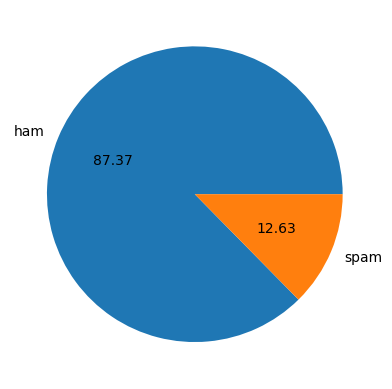

In [472]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels= ['ham','spam'], autopct = '%0.2f')
plt.show()

In [473]:
# by this data is inbalanced


In [474]:
import nltk

In [475]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vspat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [476]:
#created new column that shows the length of all text
df['num_characters'] =  df['text'].apply(len)

C:\Users\vspat\AppData\Local\Temp\ipykernel_4632\2928981326.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] =  df['text'].apply(len)


In [477]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [478]:
#creating new column where no. of words will be displayed
#for this nltk will be used 
df['num_words'] = df['text'].apply((lambda x: len(nltk.word_tokenize(x))))

C:\Users\vspat\AppData\Local\Temp\ipykernel_4632\4189022239.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply((lambda x: len(nltk.word_tokenize(x))))


In [479]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [480]:
df['num_sentences'] = df['text'].apply((lambda x: len(nltk.sent_tokenize(x))))

C:\Users\vspat\AppData\Local\Temp\ipykernel_4632\2219085206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply((lambda x: len(nltk.sent_tokenize(x))))


In [481]:
df.head()


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [482]:
df[['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [483]:
#for ham messages
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [484]:
#for spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [485]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

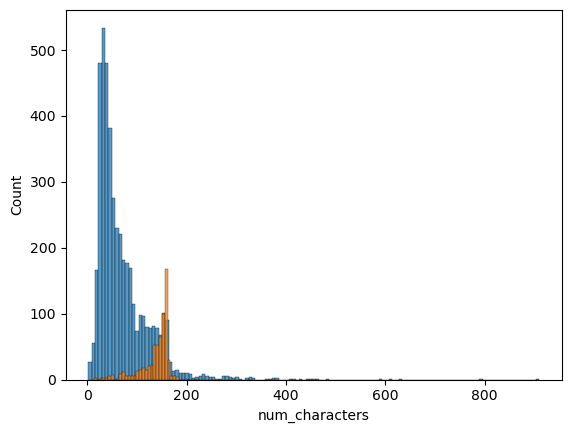

In [486]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'])

<Axes: xlabel='num_words', ylabel='Count'>

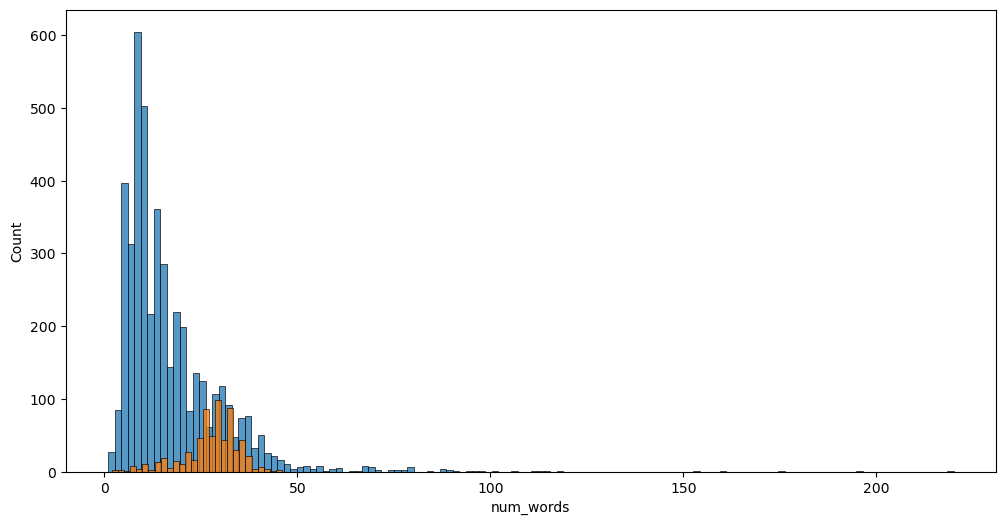

In [487]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'])

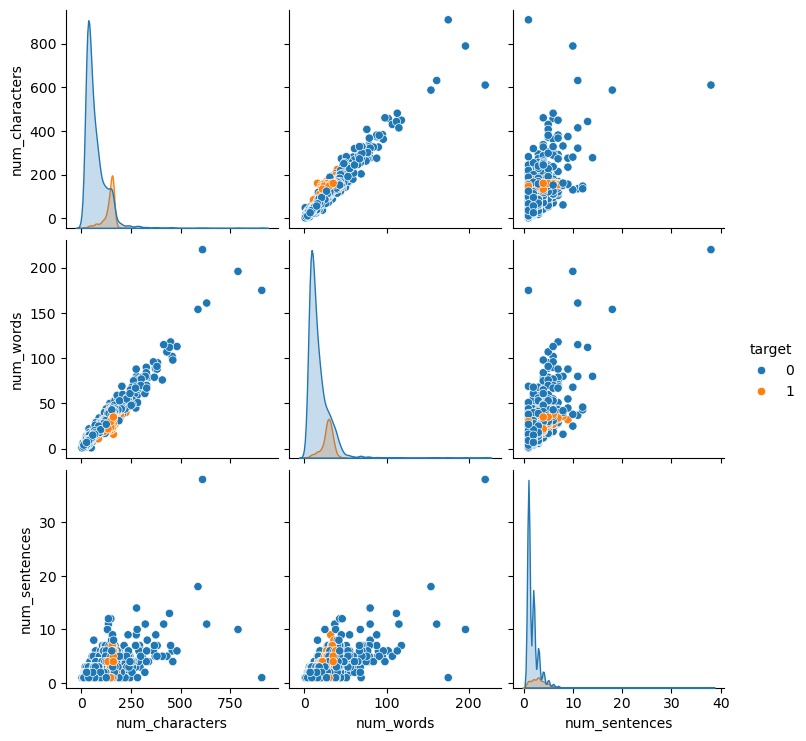

In [488]:
sns.pairplot(df,hue='target')

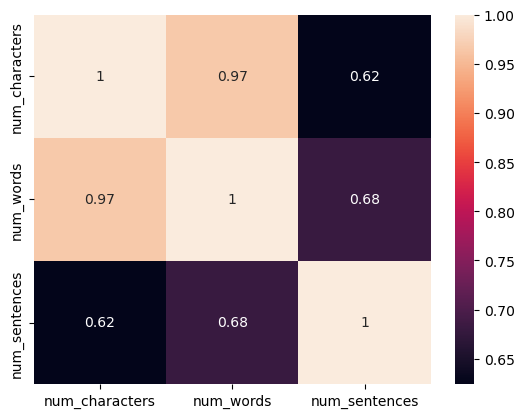

In [489]:

numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

In [490]:
print(df.dtypes)

target             int32
text              object
num_characters     int64
num_words          int64
num_sentences      int64
dtype: object


In [491]:
#data preprocessing
#1. lower case
#2. tokenization
#3. removing special characters
#4. removing stop words and punctuations
#5. stemming


In [492]:
def transform_text(text):
    #converting to lower
    text = text.lower()
    #tokenization
    text = nltk.word_tokenize(text)
    #removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    #stopword and punctutions
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    #stemming
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return y
    

In [493]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')
import string 
string.punctuation
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Loving')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vspat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'love'

In [494]:
transform_text((df['text'][10]))


['gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today']

In [495]:
df['transformed_text'] = df['text'].apply( transform_text)

C:\Users\vspat\AppData\Local\Temp\ipykernel_4632\3309326752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply( transform_text)


In [496]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"


In [497]:
from wordcloud import WordCloud
wc = WordCloud(width = 500,height = 500, min_font_size=10,background_color= 'white')

In [498]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [499]:
# generating word cloud for spam messages (words which used mostly in spam messages)
df['transformed_text'] = df['transformed_text'].astype(str)
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

C:\Users\vspat\AppData\Local\Temp\ipykernel_4632\919689294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['transformed_text'].astype(str)


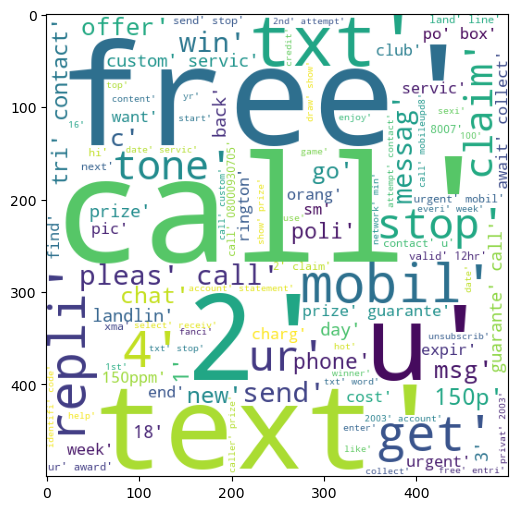

In [500]:
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)

In [501]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

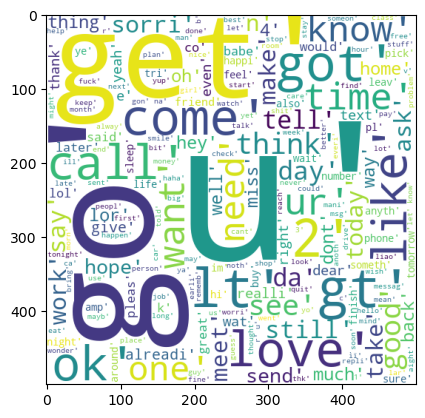

In [550]:
plt.imshow(ham_wc)

In [576]:
# getting top 30 or 50 words in spam and ham
spam_corpus =[]
for msg in df[df['target']==1] ['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [578]:
len(spam_corpus)

9939

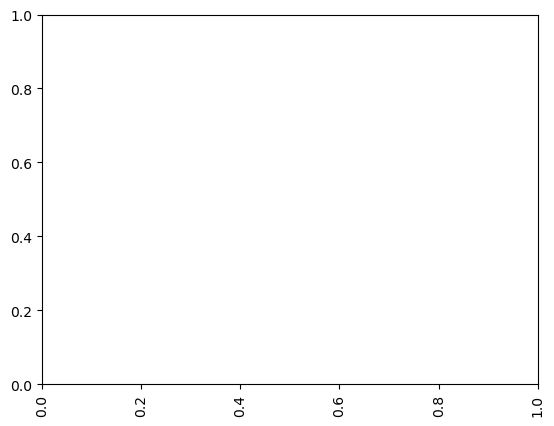

In [580]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30)[0],pd.DataFrame(Counter(spam_corpus).most_common(30)[1])))
plt.xticks(rotation='vertical')
plt.show()

In [572]:
print(Counter(spam_corpus).most_common(30))


[("'call',", 305), ("'free',", 158), ("'2',", 154), ("'txt',", 137), ("'text',", 118), ("'mobil',", 106), ("'u',", 99), ("'repli',", 99), ("'ur',", 99), ("'claim',", 96), ("'4',", 96), ("'stop',", 90), ("'prize',", 78), ("'get',", 65), ("'tone',", 61), ("'servic',", 60), ("'new',", 58), ("'send',", 57), ("'nokia',", 55), ("'contact',", 53), ("'award',", 52), ("'phone',", 52), ("'cash',", 48), ("['urgent',", 48), ("'week',", 47), ("'pleas',", 44), ("'collect',", 43), ("'win',", 41), ("'min',", 41), ("'c',", 38)]


In [582]:
print(spam_corpus)


["['free',", "'entri',", "'2',", "'wkli',", "'comp',", "'win',", "'fa',", "'cup',", "'final',", "'tkt',", "'21st',", "'may',", "'text',", "'fa',", "'87121',", "'receiv',", "'entri',", "'question',", "'std',", "'txt',", "'rate',", "'c',", "'appli',", "'08452810075over18']", "['freemsg',", "'hey',", "'darl',", "'3',", "'week',", "'word',", "'back',", "'like',", "'fun',", "'still',", "'tb',", "'ok',", "'xxx',", "'std',", "'chg',", "'send',", "'rcv']", "['winner',", "'valu',", "'network',", "'custom',", "'select',", "'receivea',", "'prize',", "'reward',", "'claim',", "'call',", "'claim',", "'code',", "'kl341',", "'valid',", "'12',", "'hour']", "['mobil',", "'11',", "'month',", "'u',", "'r',", "'entitl',", "'updat',", "'latest',", "'colour',", "'mobil',", "'camera',", "'free',", "'call',", "'mobil',", "'updat',", "'co',", "'free',", "'08002986030']", "['six',", "'chanc',", "'win',", "'cash',", "'100',", "'pound',", "'txt',", "'csh11',", "'send',", "'cost',", "'6day',", "'tsandc',", "'appli'

In [584]:
print(df_common)


NameError: name 'df_common' is not defined

In [586]:
most_common_words = Counter(spam_corpus).most_common(5)


In [588]:
print(Counter(spam_corpus).most_common(30))


[("'call',", 305), ("'free',", 158), ("'2',", 154), ("'txt',", 137), ("'text',", 118), ("'mobil',", 106), ("'u',", 99), ("'repli',", 99), ("'ur',", 99), ("'claim',", 96), ("'4',", 96), ("'stop',", 90), ("'prize',", 78), ("'get',", 65), ("'tone',", 61), ("'servic',", 60), ("'new',", 58), ("'send',", 57), ("'nokia',", 55), ("'contact',", 53), ("'award',", 52), ("'phone',", 52), ("'cash',", 48), ("['urgent',", 48), ("'week',", 47), ("'pleas',", 44), ("'collect',", 43), ("'win',", 41), ("'min',", 41), ("'c',", 38)]


In [594]:
# getting top 30 or 50 words in spam and ham
ham_corpus =[]
for msg in df[df['target']==0] ['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [596]:
print(Counter(ham_corpus).most_common(30))

[("'u',", 717), ("'go',", 353), ("'get',", 295), ("'lt',", 271), ("'2',", 270), ("'gt',", 242), ("'come',", 205), ("'like',", 196), ("'got',", 186), ("'ur',", 185), ("'time',", 175), ("'know',", 173), ("'want',", 169), ("'call',", 168), ("'love',", 166), ("'4',", 150), ("'good',", 146), ("'need',", 143), ("'day',", 139), ("'one',", 133), ("'take',", 120), ("'n',", 118), ("'make',", 116), ("'still',", 116), ("'see',", 116), ("'lor',", 110), ("'home',", 109), ("['u',", 106), ("'say',", 105), ("['ok',", 103)]


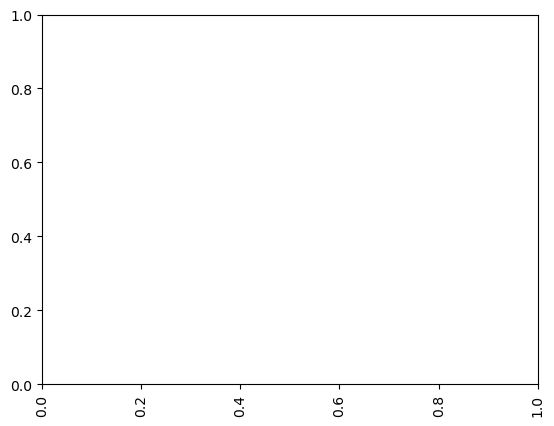

In [600]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30)[0],pd.DataFrame(Counter(ham_corpus).most_common(30)[1])))
plt.xticks(rotation='vertical')
plt.show()

In [602]:
len(ham_corpus)

35413

In [59]:
# Model  Building
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [79]:
X = cv.fit_transform(df['transformed_text']).toarray()

KeyError: 'transformed_text'

In [75]:
x.shape

NameError: name 'x' is not defined

In [45]:
y = df['target'].values

KeyError: 'target'

In [47]:
y

NameError: name 'y' is not defined

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2)

NameError: name 'x' is not defined

In [51]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BerrnoulliNB

ImportError: cannot import name 'BerrnoulliNB' from 'sklearn.naive_bayes' (C:\Users\vspat\anaconda3\Lib\site-packages\sklearn\naive_bayes.py)

In [55]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [53]:
gnb = GaussianNB()
mnb = MultinomialNB